# 🗣️ Sentiment Analysis: Aspect-Based Opinion Mining

In [ ]:
!pip install vaderSentiment
!pip install stopwords

     |████████████████████████████████| 125 kB 4.3 MB/s 


Applying topic modelling and sentiment analysis techniques in order to extract text aspects and the sentiment expressed towards such aspects.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Sonia/

/content/drive/MyDrive/Sonia


In [ ]:
import json
import pandas as pd
import numpy as np
import re
import sys
import nltk
from nltk.corpus import stopwords, sentiwordnet as swn
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import collections
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from stop_words_list import stop_words_list
from wn_affect import wn_affect 
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
#Juan
df2 = pd.read_csv("arceus_reviews.csv")
df2.head()

,review,date,score,helpful,number_of_reviews,number_of_ratings,average_user_score
0,"A fun reinvention of the Pokémon formula, hope...","Jan 29, 2022",10,49 of 62 users found this helpful,2 Reviews,2 Ratings,0.0
1,"A fun, challenging (at times), Pokemon game wi...","Jan 30, 2022",10,52 of 72 users found this helpful,60 Reviews,111 Ratings,5.8
2,El juego más infravalorado de la saga y posibl...,"Jan 29, 2022",10,48 of 62 users found this helpful,8 Reviews,12 Ratings,7.2
3,"Best pokemon game of all time! New pokemon, ne...","Jan 30, 2022",10,28 of 35 users found this helpful,1 Review,4 Ratings,5.0
4,"One outstanding experience, that is certain. I...","Feb 3, 2022",10,4 of 8 users found this helpful,1 Review,14 Ratings,9.0


In [ ]:
df = pd.DataFrame(df2, columns =['review'])
display(df)

,review
0,"A fun reinvention of the Pokémon formula, hope..."
1,"A fun, challenging (at times), Pokemon game wi..."
2,El juego más infravalorado de la saga y posibl...
3,"Best pokemon game of all time! New pokemon, ne..."
4,"One outstanding experience, that is certain. I..."
...,...
1062,"Final boss is too cheap, that is not fail at a..."
1063,Boss fights aren’t thought out properly. Too m...
1064,not open world and kinda boring. graphics are ...
1065,Schwaches Spiel... (Meiner Meinung nach)Grafik...


In [ ]:
df.columns = ['reviews']
display(df)

,reviews
0,"A fun reinvention of the Pokémon formula, hope..."
1,"A fun, challenging (at times), Pokemon game wi..."
2,El juego más infravalorado de la saga y posibl...
3,"Best pokemon game of all time! New pokemon, ne..."
4,"One outstanding experience, that is certain. I..."
...,...
1062,"Final boss is too cheap, that is not fail at a..."
1063,Boss fights aren’t thought out properly. Too m...
1064,not open world and kinda boring. graphics are ...
1065,Schwaches Spiel... (Meiner Meinung nach)Grafik...


In [ ]:
# case text as lowercase, remove punctuation, remove extra whitespace in string and on both sides of string

df['remove_lower_punct'] = df['reviews'].str.lower().str.replace("'", '').str.replace('[^\w\s]', ' ').str.replace(" \d+", " ").str.replace(' +', ' ').str.strip()

display(df.head(10))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,reviews,remove_lower_punct
0,"A fun reinvention of the Pokémon formula, hope...",a fun reinvention of the pokémon formula hopef...
1,"A fun, challenging (at times), Pokemon game wi...",a fun challenging at times pokemon game with a...
2,El juego más infravalorado de la saga y posibl...,el juego más infravalorado de la saga y posibl...
3,"Best pokemon game of all time! New pokemon, ne...",best pokemon game of all time new pokemon new ...
4,"One outstanding experience, that is certain. I...",one outstanding experience that is certain i a...
5,Incredible game that moves the Pokemon series ...,incredible game that moves the pokemon series ...
6,Im so addicted! New mechanics and ideas are re...,im so addicted new mechanics and ideas are rea...
7,This is such a spectacular evolution for the P...,this is such a spectacular evolution for the p...
8,"A delight to play this game, perfect evolution...",a delight to play this game perfect evolution ...
9,This is the best Pokémon game I've ever played...,this is the best pokémon game ive ever played ...


In [ ]:
df['remove_lower_punct'].astype(str)

0       a fun reinvention of the pokémon formula hopef...
1       a fun challenging at times pokemon game with a...
2       el juego más infravalorado de la saga y posibl...
3       best pokemon game of all time new pokemon new ...
4       one outstanding experience that is certain i a...
                              ...                        
1062    final boss is too cheap that is not fail at al...
1063    boss fights aren t thought out properly too ma...
1064    not open world and kinda boring graphics are p...
1065    schwaches spiel meiner meinung nach grafikgame...
1066    poikemon es un juego rpg no es un juego de com...
Name: remove_lower_punct, Length: 1067, dtype: object

In [ ]:
# apply sentiment analysis
analyser = SentimentIntensityAnalyzer()

sentiment_score_list = []
sentiment_label_list = []

for i in df['remove_lower_punct'].values.tolist():
    sentiment_score = analyser.polarity_scores(i)

    if sentiment_score['compound'] >= 0.05:
        sentiment_score_list.append(sentiment_score['compound'])
        sentiment_label_list.append('Positive')
    elif sentiment_score['compound'] > -0.05 and sentiment_score['compound'] < 0.05:
        sentiment_score_list.append(sentiment_score['compound'])
        sentiment_label_list.append('Neutral')
    elif sentiment_score['compound'] <= -0.05:
        sentiment_score_list.append(sentiment_score['compound'])
        sentiment_label_list.append('Negative')
    
df['sentiment'] = sentiment_label_list
df['sentiment score'] = sentiment_score_list

display(df.head(10))

,reviews,remove_lower_punct,sentiment,sentiment score
0,"A fun reinvention of the Pokémon formula, hope...",a fun reinvention of the pokémon formula hopef...,Positive,0.8834
1,"A fun, challenging (at times), Pokemon game wi...",a fun challenging at times pokemon game with a...,Positive,0.9565
2,El juego más infravalorado de la saga y posibl...,el juego más infravalorado de la saga y posibl...,Neutral,0.0000
3,"Best pokemon game of all time! New pokemon, ne...",best pokemon game of all time new pokemon new ...,Positive,0.7964
4,"One outstanding experience, that is certain. I...",one outstanding experience that is certain i a...,Positive,0.9708
5,Incredible game that moves the Pokemon series ...,incredible game that moves the pokemon series ...,Positive,0.8619
6,Im so addicted! New mechanics and ideas are re...,im so addicted new mechanics and ideas are rea...,Positive,0.8701
7,This is such a spectacular evolution for the P...,this is such a spectacular evolution for the p...,Positive,0.5267
8,"A delight to play this game, perfect evolution...",a delight to play this game perfect evolution ...,Positive,0.9603
9,This is the best Pokémon game I've ever played...,this is the best pokémon game ive ever played ...,Positive,0.6652


In [ ]:
df['sentiment'].value_counts()

Positive    732
Negative    231
Neutral     104
Name: sentiment, dtype: int64

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# tokenise string

df['tokenise'] = df.apply(lambda row: nltk.word_tokenize(row[1]), axis=1)

display(df.head(10))

,reviews,remove_lower_punct,sentiment,sentiment score,tokenise
0,"A fun reinvention of the Pokémon formula, hope...",a fun reinvention of the pokémon formula hopef...,Positive,0.8834,"[a, fun, reinvention, of, the, pokémon, formul..."
1,"A fun, challenging (at times), Pokemon game wi...",a fun challenging at times pokemon game with a...,Positive,0.9565,"[a, fun, challenging, at, times, pokemon, game..."
2,El juego más infravalorado de la saga y posibl...,el juego más infravalorado de la saga y posibl...,Neutral,0.0000,"[el, juego, más, infravalorado, de, la, saga, ..."
3,"Best pokemon game of all time! New pokemon, ne...",best pokemon game of all time new pokemon new ...,Positive,0.7964,"[best, pokemon, game, of, all, time, new, poke..."
4,"One outstanding experience, that is certain. I...",one outstanding experience that is certain i a...,Positive,0.9708,"[one, outstanding, experience, that, is, certa..."
5,Incredible game that moves the Pokemon series ...,incredible game that moves the pokemon series ...,Positive,0.8619,"[incredible, game, that, moves, the, pokemon, ..."
6,Im so addicted! New mechanics and ideas are re...,im so addicted new mechanics and ideas are rea...,Positive,0.8701,"[im, so, addicted, new, mechanics, and, ideas,..."
7,This is such a spectacular evolution for the P...,this is such a spectacular evolution for the p...,Positive,0.5267,"[this, is, such, a, spectacular, evolution, fo..."
8,"A delight to play this game, perfect evolution...",a delight to play this game perfect evolution ...,Positive,0.9603,"[a, delight, to, play, this, game, perfect, ev..."
9,This is the best Pokémon game I've ever played...,this is the best pokémon game ive ever played ...,Positive,0.6652,"[this, is, the, best, pokémon, game, ive, ever..."


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# initiate stopwords from nltk

stop_words = stopwords.words('english')

# add additional missing terms

stop_words.extend(stop_words_list) 

# remove stopwords

df['remove_stopwords'] = df['tokenise'].apply(lambda x: [item for item in x if item not in stop_words])

display(df.head(10))

,reviews,remove_lower_punct,sentiment,sentiment score,tokenise,remove_stopwords
0,"A fun reinvention of the Pokémon formula, hope...",a fun reinvention of the pokémon formula hopef...,Positive,0.8834,"[a, fun, reinvention, of, the, pokémon, formul...","[fun, reinvention, pokémon, formula, hopefully..."
1,"A fun, challenging (at times), Pokemon game wi...",a fun challenging at times pokemon game with a...,Positive,0.9565,"[a, fun, challenging, at, times, pokemon, game...","[fun, challenging, times, pokemon, game, addic..."
2,El juego más infravalorado de la saga y posibl...,el juego más infravalorado de la saga y posibl...,Neutral,0.0000,"[el, juego, más, infravalorado, de, la, saga, ...","[el, juego, más, infravalorado, de, la, saga, ..."
3,"Best pokemon game of all time! New pokemon, ne...",best pokemon game of all time new pokemon new ...,Positive,0.7964,"[best, pokemon, game, of, all, time, new, poke...","[best, pokemon, game, time, pokemon, stuff, wa..."
4,"One outstanding experience, that is certain. I...",one outstanding experience that is certain i a...,Positive,0.9708,"[one, outstanding, experience, that, is, certa...","[outstanding, experience, absolutely, directio..."
5,Incredible game that moves the Pokemon series ...,incredible game that moves the pokemon series ...,Positive,0.8619,"[incredible, game, that, moves, the, pokemon, ...","[incredible, game, moves, pokemon, series, for..."
6,Im so addicted! New mechanics and ideas are re...,im so addicted new mechanics and ideas are rea...,Positive,0.8701,"[im, so, addicted, new, mechanics, and, ideas,...","[addicted, mechanics, ideas, fantastic, playin..."
7,This is such a spectacular evolution for the P...,this is such a spectacular evolution for the p...,Positive,0.5267,"[this, is, such, a, spectacular, evolution, fo...","[spectacular, evolution, pokémon, franchise, m..."
8,"A delight to play this game, perfect evolution...",a delight to play this game perfect evolution ...,Positive,0.9603,"[a, delight, to, play, this, game, perfect, ev...","[delight, play, game, perfect, evolution, saga..."
9,This is the best Pokémon game I've ever played...,this is the best pokémon game ive ever played ...,Positive,0.6652,"[this, is, the, best, pokémon, game, ive, ever...","[best, pokémon, game, played, feels, thought, ..."


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# initiate nltk lemmatiser

wordnet_lemmatizer = WordNetLemmatizer()

# lemmatise words

df['lemmatise'] = df['remove_stopwords'].apply(lambda x: [wordnet_lemmatizer.lemmatize(y) for y in x]) 

display(df.head(10))

,reviews,remove_lower_punct,sentiment,sentiment score,tokenise,remove_stopwords,lemmatise
0,"A fun reinvention of the Pokémon formula, hope...",a fun reinvention of the pokémon formula hopef...,Positive,0.8834,"[a, fun, reinvention, of, the, pokémon, formul...","[fun, reinvention, pokémon, formula, hopefully...","[fun, reinvention, pokémon, formula, hopefully..."
1,"A fun, challenging (at times), Pokemon game wi...",a fun challenging at times pokemon game with a...,Positive,0.9565,"[a, fun, challenging, at, times, pokemon, game...","[fun, challenging, times, pokemon, game, addic...","[fun, challenging, time, pokemon, game, addict..."
2,El juego más infravalorado de la saga y posibl...,el juego más infravalorado de la saga y posibl...,Neutral,0.0000,"[el, juego, más, infravalorado, de, la, saga, ...","[el, juego, más, infravalorado, de, la, saga, ...","[el, juego, más, infravalorado, de, la, saga, ..."
3,"Best pokemon game of all time! New pokemon, ne...",best pokemon game of all time new pokemon new ...,Positive,0.7964,"[best, pokemon, game, of, all, time, new, poke...","[best, pokemon, game, time, pokemon, stuff, wa...","[best, pokemon, game, time, pokemon, stuff, wa..."
4,"One outstanding experience, that is certain. I...",one outstanding experience that is certain i a...,Positive,0.9708,"[one, outstanding, experience, that, is, certa...","[outstanding, experience, absolutely, directio...","[outstanding, experience, absolutely, directio..."
5,Incredible game that moves the Pokemon series ...,incredible game that moves the pokemon series ...,Positive,0.8619,"[incredible, game, that, moves, the, pokemon, ...","[incredible, game, moves, pokemon, series, for...","[incredible, game, move, pokemon, series, forw..."
6,Im so addicted! New mechanics and ideas are re...,im so addicted new mechanics and ideas are rea...,Positive,0.8701,"[im, so, addicted, new, mechanics, and, ideas,...","[addicted, mechanics, ideas, fantastic, playin...","[addicted, mechanic, idea, fantastic, playing,..."
7,This is such a spectacular evolution for the P...,this is such a spectacular evolution for the p...,Positive,0.5267,"[this, is, such, a, spectacular, evolution, fo...","[spectacular, evolution, pokémon, franchise, m...","[spectacular, evolution, pokémon, franchise, m..."
8,"A delight to play this game, perfect evolution...",a delight to play this game perfect evolution ...,Positive,0.9603,"[a, delight, to, play, this, game, perfect, ev...","[delight, play, game, perfect, evolution, saga...","[delight, play, game, perfect, evolution, saga..."
9,This is the best Pokémon game I've ever played...,this is the best pokémon game ive ever played ...,Positive,0.6652,"[this, is, the, best, pokémon, game, ive, ever...","[best, pokémon, game, played, feels, thought, ...","[best, pokémon, game, played, feel, thought, p..."


In [ ]:
# initialise the count vectorizer

vectorizer = CountVectorizer(analyzer = 'word', ngram_range = (2, 2))
                            
# join the processed data to be vectorised

vectors = []

for index, row in df.iterrows():
    vectors.append(", ".join(row[6]))

vectorised = vectorizer.fit_transform(vectors)

print(vectorised)

  (0, 13583)	1
  (0, 29235)	1
  (0, 27192)	1
  (0, 12827)	1
  (0, 17422)	1
  (0, 36548)	1
  (0, 19259)	1
  (0, 4675)	1
  (1, 13463)	1
  (1, 4651)	1
  (1, 34968)	1
  (1, 26605)	1
  (1, 13764)	1
  (1, 434)	1
  (1, 14976)	1
  (1, 20870)	1
  (1, 18563)	1
  (1, 33686)	1
  (1, 12217)	1
  (1, 4512)	1
  (1, 26646)	1
  (1, 17655)	1
  (1, 32684)	1
  (1, 8436)	1
  (1, 16059)	2
  :	:
  (1065, 9035)	1
  (1066, 9348)	1
  (1066, 7082)	1
  (1066, 19019)	1
  (1066, 5331)	1
  (1066, 20928)	1
  (1066, 5809)	1
  (1066, 6945)	1
  (1066, 7052)	1
  (1066, 10368)	1
  (1066, 6167)	1
  (1066, 26179)	1
  (1066, 19085)	1
  (1066, 30049)	1
  (1066, 5332)	1
  (1066, 7001)	1
  (1066, 211)	1
  (1066, 32164)	1
  (1066, 20961)	1
  (1066, 18881)	1
  (1066, 23729)	1
  (1066, 3873)	1
  (1066, 8356)	1
  (1066, 1650)	1
  (1066, 35278)	1


In [ ]:
dfB4LDA= df

In [ ]:
dfB4LDA

,reviews,remove_lower_punct,sentiment,sentiment score,tokenise,remove_stopwords,lemmatise
0,"A fun reinvention of the Pokémon formula, hope...",a fun reinvention of the pokémon formula hopef...,Positive,0.8834,"[a, fun, reinvention, of, the, pokémon, formul...","[fun, reinvention, pokémon, formula, hopefully...","[fun, reinvention, pokémon, formula, hopefully..."
1,"A fun, challenging (at times), Pokemon game wi...",a fun challenging at times pokemon game with a...,Positive,0.9565,"[a, fun, challenging, at, times, pokemon, game...","[fun, challenging, times, pokemon, game, addic...","[fun, challenging, time, pokemon, game, addict..."
2,El juego más infravalorado de la saga y posibl...,el juego más infravalorado de la saga y posibl...,Neutral,0.0000,"[el, juego, más, infravalorado, de, la, saga, ...","[el, juego, más, infravalorado, de, la, saga, ...","[el, juego, más, infravalorado, de, la, saga, ..."
3,"Best pokemon game of all time! New pokemon, ne...",best pokemon game of all time new pokemon new ...,Positive,0.7964,"[best, pokemon, game, of, all, time, new, poke...","[best, pokemon, game, time, pokemon, stuff, wa...","[best, pokemon, game, time, pokemon, stuff, wa..."
4,"One outstanding experience, that is certain. I...",one outstanding experience that is certain i a...,Positive,0.9708,"[one, outstanding, experience, that, is, certa...","[outstanding, experience, absolutely, directio...","[outstanding, experience, absolutely, directio..."
...,...,...,...,...,...,...,...
1062,"Final boss is too cheap, that is not fail at a...",final boss is too cheap that is not fail at al...,Negative,-0.0900,"[final, boss, is, too, cheap, that, is, not, f...","[final, boss, cheap, fail, type, insulting]","[final, bos, cheap, fail, type, insulting]"
1063,Boss fights aren’t thought out properly. Too m...,boss fights aren t thought out properly too ma...,Negative,-0.4019,"[boss, fights, aren, t, thought, out, properly...","[boss, fights, thought, properly, bugs, sloppy...","[bos, fight, thought, properly, bug, sloppy, d..."
1064,not open world and kinda boring. graphics are ...,not open world and kinda boring graphics are p...,Negative,-0.3197,"[not, open, world, and, kinda, boring, graphic...","[open, kinda, boring, graphics, pretty, bad, g...","[open, kinda, boring, graphic, pretty, bad, ga..."
1065,Schwaches Spiel... (Meiner Meinung nach)Grafik...,schwaches spiel meiner meinung nach grafikgame...,Neutral,0.0000,"[schwaches, spiel, meiner, meinung, nach, graf...","[schwaches, spiel, meiner, meinung, nach, graf...","[schwaches, spiel, meiner, meinung, nach, graf..."


In [ ]:
#Hugo
#LDA Model

lda_model = LatentDirichletAllocation(n_components = 5, # number of topics
                                  random_state = 10,          # random state
                                  evaluate_every = -1,      # compute perplexity every n iters, default: Don't
                                  n_jobs = -1,              # Use all available CPUs
                                 )

lda_output = lda_model.fit_transform(vectorised)

# column names

topic_names = ["Topic" + str(i) for i in range(1, lda_model.n_components + 1)]

# make the pandas dataframe

df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns = topic_names)

# get dominant topic for each document

dominant_topic = (np.argmax(df_document_topic.values, axis=1)+1)
df_document_topic['Dominant_topic'] = dominant_topic

# join to original dataframes

dfB4LDA = pd.merge(df, df_document_topic, left_index = True, right_index = True, how = 'outer')
display(dfB4LDA.head(10))

,reviews,remove_lower_punct,sentiment,sentiment score,tokenise,remove_stopwords,lemmatise,Topic1,Topic2,Topic3,Topic4,Topic5,Dominant_topic
0,"A fun reinvention of the Pokémon formula, hope...",a fun reinvention of the pokémon formula hopef...,Positive,0.8834,"[a, fun, reinvention, of, the, pokémon, formul...","[fun, reinvention, pokémon, formula, hopefully...","[fun, reinvention, pokémon, formula, hopefully...",0.02,0.02,0.91,0.02,0.02,3
1,"A fun, challenging (at times), Pokemon game wi...",a fun challenging at times pokemon game with a...,Positive,0.9565,"[a, fun, challenging, at, times, pokemon, game...","[fun, challenging, times, pokemon, game, addic...","[fun, challenging, time, pokemon, game, addict...",0.00,0.99,0.00,0.00,0.00,2
2,El juego más infravalorado de la saga y posibl...,el juego más infravalorado de la saga y posibl...,Neutral,0.0000,"[el, juego, más, infravalorado, de, la, saga, ...","[el, juego, más, infravalorado, de, la, saga, ...","[el, juego, más, infravalorado, de, la, saga, ...",0.96,0.01,0.01,0.01,0.01,1
3,"Best pokemon game of all time! New pokemon, ne...",best pokemon game of all time new pokemon new ...,Positive,0.7964,"[best, pokemon, game, of, all, time, new, poke...","[best, pokemon, game, time, pokemon, stuff, wa...","[best, pokemon, game, time, pokemon, stuff, wa...",0.02,0.02,0.02,0.02,0.93,5
4,"One outstanding experience, that is certain. I...",one outstanding experience that is certain i a...,Positive,0.9708,"[one, outstanding, experience, that, is, certa...","[outstanding, experience, absolutely, directio...","[outstanding, experience, absolutely, directio...",0.01,0.98,0.01,0.01,0.01,2
5,Incredible game that moves the Pokemon series ...,incredible game that moves the pokemon series ...,Positive,0.8619,"[incredible, game, that, moves, the, pokemon, ...","[incredible, game, moves, pokemon, series, for...","[incredible, game, move, pokemon, series, forw...",0.01,0.01,0.01,0.96,0.01,4
6,Im so addicted! New mechanics and ideas are re...,im so addicted new mechanics and ideas are rea...,Positive,0.8701,"[im, so, addicted, new, mechanics, and, ideas,...","[addicted, mechanics, ideas, fantastic, playin...","[addicted, mechanic, idea, fantastic, playing,...",0.01,0.96,0.01,0.01,0.01,2
7,This is such a spectacular evolution for the P...,this is such a spectacular evolution for the p...,Positive,0.5267,"[this, is, such, a, spectacular, evolution, fo...","[spectacular, evolution, pokémon, franchise, m...","[spectacular, evolution, pokémon, franchise, m...",0.01,0.01,0.01,0.01,0.95,5
8,"A delight to play this game, perfect evolution...",a delight to play this game perfect evolution ...,Positive,0.9603,"[a, delight, to, play, this, game, perfect, ev...","[delight, play, game, perfect, evolution, saga...","[delight, play, game, perfect, evolution, saga...",0.01,0.01,0.01,0.96,0.01,4
9,This is the best Pokémon game I've ever played...,this is the best pokémon game ive ever played ...,Positive,0.6652,"[this, is, the, best, pokémon, game, ive, ever...","[best, pokémon, game, played, feels, thought, ...","[best, pokémon, game, played, feel, thought, p...",0.02,0.02,0.02,0.02,0.93,5


In [ ]:
# index names
#docnames = ['Doc' + str(i) for i in range(len(dfB4LDA))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topic_names)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topic_names

df_topic_no = pd.DataFrame(df_topic_keywords.idxmax())
df_scores = pd.DataFrame(df_topic_keywords.max())

tmp = pd.merge(df_topic_no, df_scores, left_index=True, right_index=True)
tmp.columns = ['topic', 'relevance_score']

display(tmp)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,topic,relevance_score
100 adicted,Topic1,1.199990
100 direction,Topic2,1.199994
20 hour,Topic4,1.199994
30 hour,Topic3,1.199994
50 hour,Topic1,1.199995
...,...,...
포켓몬스터 불가사의,Topic4,1.199999
포획 도감,Topic4,1.199999
프리크이다 스토리는,Topic4,1.199999
해비 유저도,Topic4,1.199999


In [ ]:
banned = ['Topic']
tmp = tmp.replace(dict(zip(banned,['']*len(banned))),regex=True)

In [ ]:
tmp["topic"] = tmp["topic"].astype(int) 
tmp.head()

,topic,relevance_score
100 adicted,1,1.199990
100 direction,2,1.199994
20 hour,4,1.199994
30 hour,3,1.199994
50 hour,1,1.199995


In [ ]:
all_topics = []

for i in tmp['topic'].unique():    
    tmp_1 = tmp.loc[tmp['topic'] == i].reset_index()
    tmp_1 = tmp_1.sort_values('relevance_score', ascending=False).head(1)

    tmp_1['topic'] = tmp_1['topic'] + 1
    
    tmp_2 = []
    tmp_2.append(tmp_1['topic'].unique()[0])
    tmp_2.append(list(tmp_1['index'].unique()))
    all_topics.append(tmp_2)

all_topics = pd.DataFrame(all_topics, columns=['Dominant_topic', 'topic_name'])
display(all_topics)

,Dominant_topic,topic_name
0,2,[pokemon game]
1,3,[la saga]
2,5,[legend arceus]
3,4,[game play]
4,6,[voice acting]


In [ ]:
results = dfB4LDA.groupby(['Dominant_topic', 'sentiment']).count().reset_index()

results = results.merge(all_topics, on='Dominant_topic')
results['topic_name'] = results['topic_name'].apply(', '.join)

graph_results = results[['topic_name', 'sentiment', 'sentiment score']]
graph_results = graph_results.pivot(index='topic_name', columns='sentiment', values='sentiment score').reset_index()

graph_results.set_index('topic_name', inplace=True)

display(graph_results)

sentiment,Negative,Neutral,Positive
topic_name,,,
game play,53,23,148
la saga,40,16,130
legend arceus,44,19,119
pokemon game,49,23,137


In [ ]:
graph_results=graph_results.drop(graph_results.index[3])
display(graph_results)

sentiment,Negative,Neutral,Positive
topic_name,,,
game play,53,23,148
la saga,40,16,130
legend arceus,44,19,119


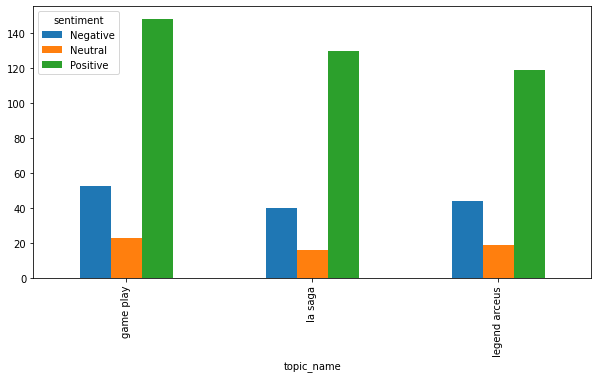

In [ ]:
fig = graph_results.plot.bar(rot=90, figsize=(10,5))
fig.figure.savefig('sentiment_analysis.png', bbox_inches='tight', dpi=300)